<a href="https://colab.research.google.com/github/Khush10001/code/blob/main/Ages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-387112498.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age_Group", y="Population_Millions", data=df, palette="viridis")


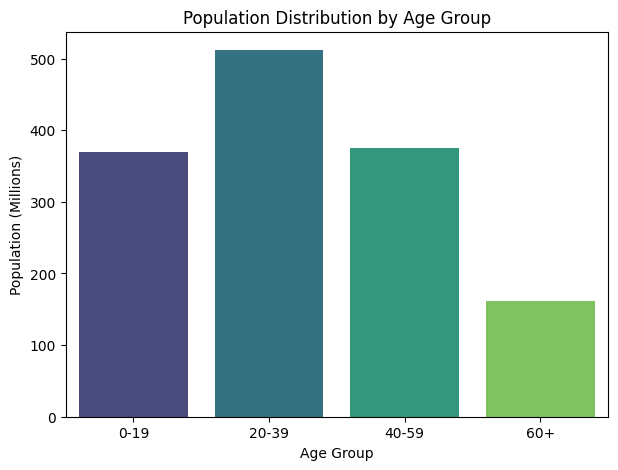

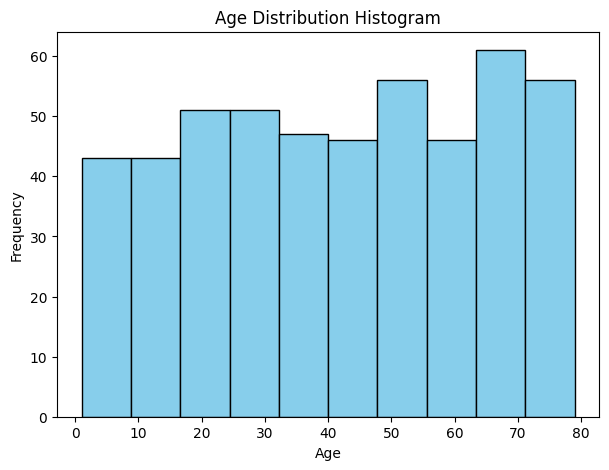

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


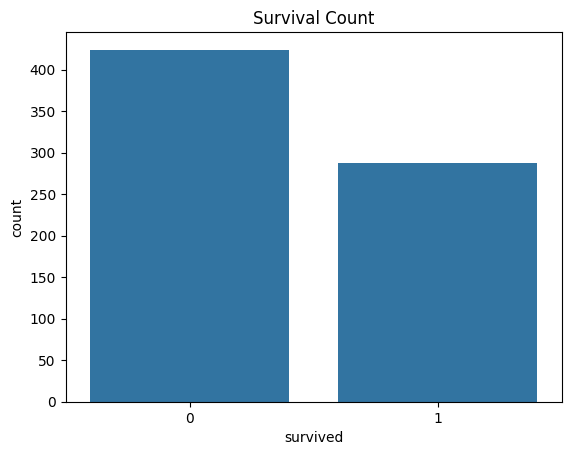

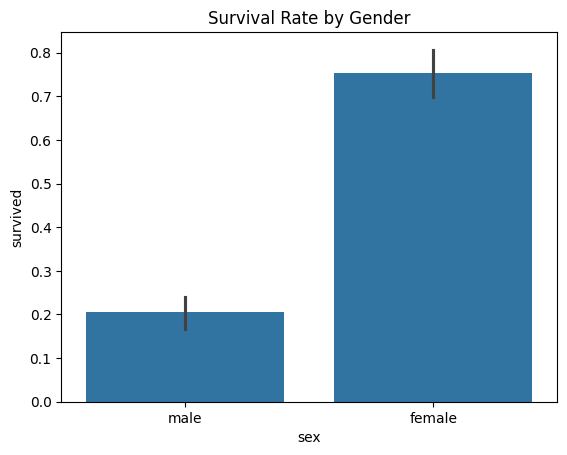

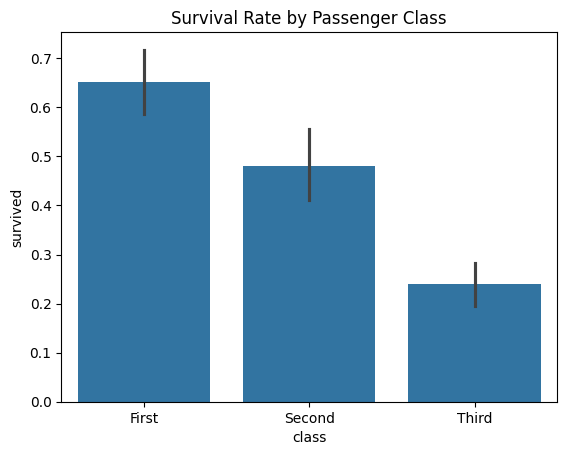

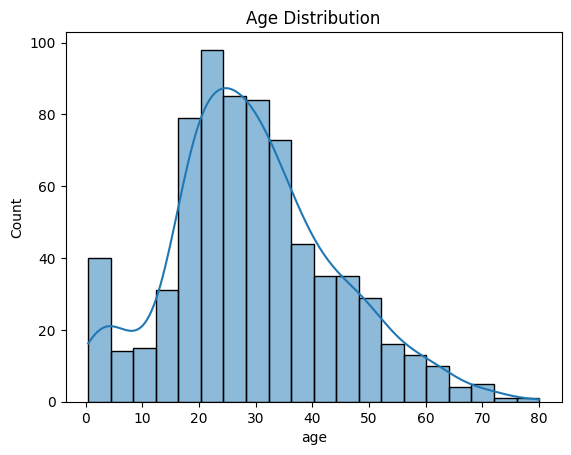

HTTPError: HTTP Error 404: Not Found

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset for age groups
data = {
    "Age_Group": ["0-19", "20-39", "40-59", "60+"],
    "Population_Millions": [370, 512, 375, 162]
}
df = pd.DataFrame(data)

# Bar Chart
plt.figure(figsize=(7,5))
sns.barplot(x="Age_Group", y="Population_Millions", data=df, palette="viridis")
plt.title("Population Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Population (Millions)")
plt.show()

# Histogram (randomly generated ages to simulate population data)
ages = np.random.randint(1, 80, 500)
plt.figure(figsize=(7,5))
plt.hist(ages, bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#.................................................

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn (works directly in Colab)
titanic = sns.load_dataset("titanic")

# Data Cleaning
print("Missing values:\n", titanic.isnull().sum())
titanic = titanic.dropna(subset=["age", "embarked"])
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

# EDA - Survival Count
sns.countplot(x="survived", data=titanic)
plt.title("Survival Count")
plt.show()

# EDA - Survival by Gender
sns.barplot(x="sex", y="survived", data=titanic)
plt.title("Survival Rate by Gender")
plt.show()

# EDA - Survival by Class
sns.barplot(x="class", y="survived", data=titanic)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age distribution
sns.histplot(titanic["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

#..................................................

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset (UCI repo direct link works in Colab)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.csv"
df = pd.read_csv(url, sep=";")

print("Dataset shape:", df.shape)
print(df.head())

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features & target
X = df_encoded.drop("y_yes", axis=1)
y = df_encoded["y_yes"]

# Split train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot decision tree
plt.figure(figsize=(15,8))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()

#.....................................................

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (public dataset from Vega)
url = "https://raw.githubusercontent.com/vega/vega-datasets/master/data/seattle-weather.csv"
df = pd.read_csv(url)

print(df.head())

# Accident count by weather (simulating accident frequency)
sns.countplot(x="weather", data=df)
plt.title("Accidents by Weather Condition")
plt.xticks(rotation=45)
plt.show()

# Accident count by month
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
sns.countplot(x="month", data=df)
plt.title("Accidents by Month")
plt.show()

# Heatmap (month vs weather)
accident_matrix = df.groupby(["month", "weather"]).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(accident_matrix, cmap="Blues", annot=True, fmt="d")
plt.title("Accident Hotspots by Weather and Month")
plt.show()